In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

In [3]:
zipcode = '97035'
filename = 'data/' + zipcode + '_homes_data_cleaned.csv'
df = pd.read_csv(filename)

In [4]:
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,has_hoa,senior_community_yn,style,county,new_construction_yn
count,162,162,1.620000e+02,162.000000,162.000000,162.000000,162,162.000000,162,162,162,162,162,162
unique,162,162,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2
top,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,No,Single Family Residential,Clackamas County,No
freq,1,1,NaN,NaN,NaN,NaN,90,NaN,104,92,160,106,123,157
mean,NaN,NaN,9.283610e+05,3.061728,2.391975,2115.493827,NaN,1980.222222,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.177257e+06,1.101616,0.988630,1321.639093,NaN,18.294689,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.500000e+05,1.000000,1.000000,600.000000,NaN,1920.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.325000e+05,2.000000,2.000000,1178.500000,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,6.328445e+05,3.000000,2.500000,1742.500000,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,9.497500e+05,4.000000,2.500000,2706.750000,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['log_price'] = np.log(df['price'])

In [6]:
df.isnull().sum()

Address                0
link                   0
price                  0
beds                   0
baths                  0
sqft                   0
view_yn                0
yr_built               0
cooling_yn             0
has_hoa                0
senior_community_yn    0
style                  0
county                 0
new_construction_yn    0
log_price              0
dtype: int64

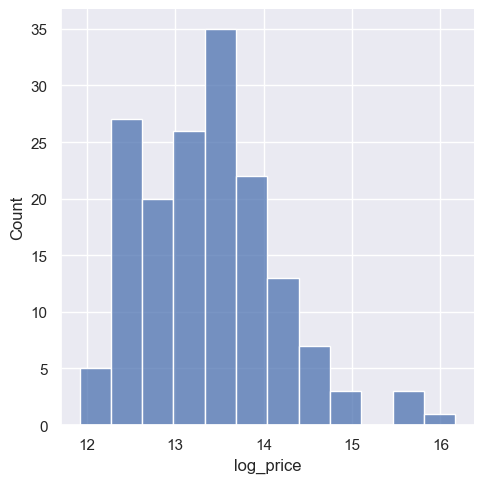

In [7]:
ax=sns.displot(df['log_price'])

In [8]:
q = df['log_price'].quantile(0.95)
df = df[df['log_price']<q]

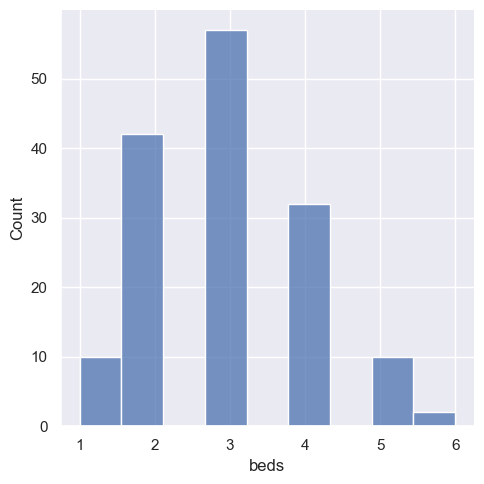

In [9]:
ax=sns.displot(df['beds'])

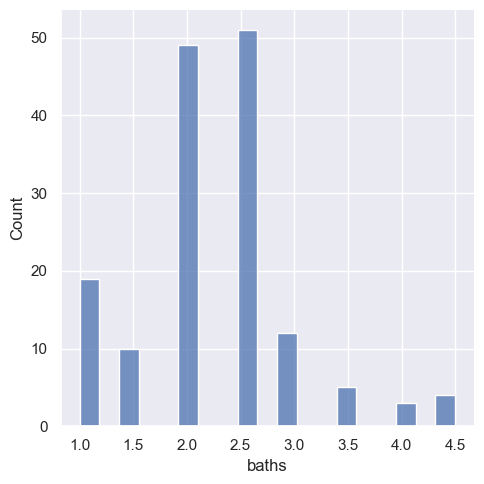

In [10]:
ax=sns.displot(df['baths'])

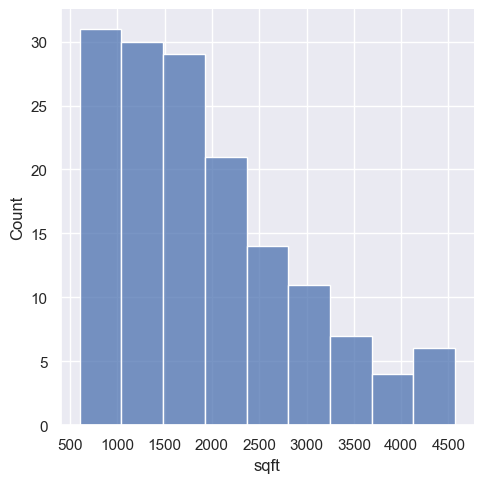

In [11]:
ax=sns.displot(df['sqft'])

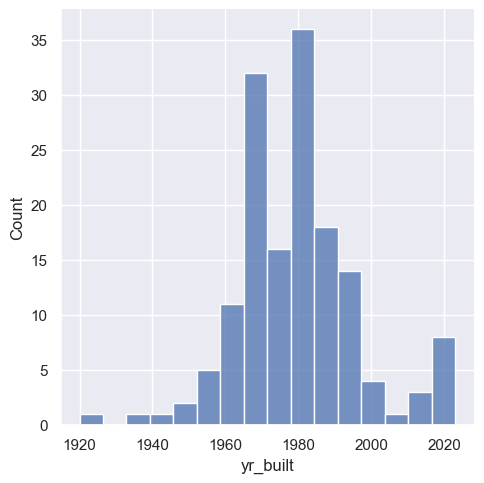

In [12]:
ax=sns.displot(df['yr_built'])

In [13]:
q = df['yr_built'].quantile(0.01)
df = df[df['yr_built']>q]

In [14]:
df = df.reset_index(drop=True)
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,has_hoa,senior_community_yn,style,county,new_construction_yn,log_price
count,151,151,1.510000e+02,151.000000,151.000000,151.000000,151,151.000000,151,151,151,151,151,151,151.000000
unique,151,151,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,NaN
top,4965 SW Park Bluff Pl,https://www.redfin.com/OR/Lake-Oswego/4965-Par...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,No,Single Family Residential,Clackamas County,No,NaN
freq,1,1,NaN,NaN,NaN,NaN,83,NaN,94,89,149,95,112,149,NaN
mean,NaN,NaN,7.049048e+05,2.973510,2.238411,1906.059603,NaN,1979.894040,NaN,NaN,NaN,NaN,NaN,NaN,13.274740
std,NaN,NaN,4.444198e+05,1.070495,0.754618,975.876169,NaN,15.440705,NaN,NaN,NaN,NaN,NaN,NaN,0.629456
min,NaN,NaN,1.500000e+05,1.000000,1.000000,600.000000,NaN,1941.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.918391
25%,NaN,NaN,3.240000e+05,2.000000,2.000000,1155.000000,NaN,1970.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.688456
50%,NaN,NaN,6.120940e+05,3.000000,2.000000,1619.000000,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.324641
75%,NaN,NaN,8.925000e+05,4.000000,2.500000,2430.000000,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.701746


## Checking OLS Assumptions

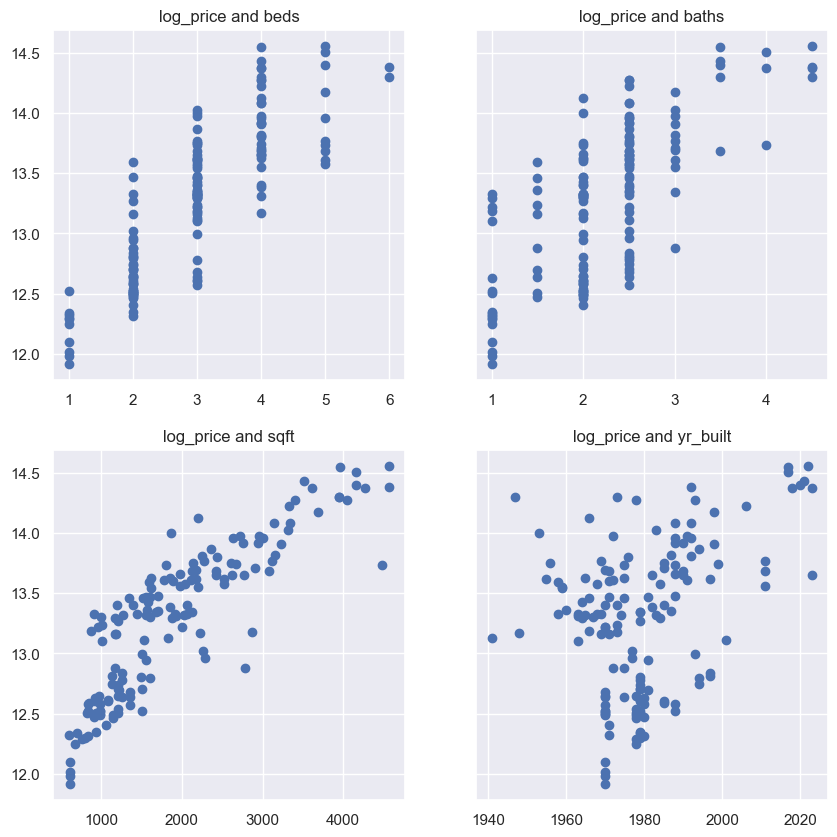

In [15]:
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
ax1.scatter(df['beds'], df['log_price'])
ax1.set_title('log_price and beds')
ax2.scatter(df['baths'], df['log_price'])
ax2.set_title('log_price and baths')
ax3.scatter(df['sqft'], df['log_price'])
ax3.set_title('log_price and sqft')
ax4.scatter(df['yr_built'], df['log_price'])
ax4.set_title('log_price and yr_built')

plt.show()

## Checking for multicollinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['beds', 'baths', 'sqft', 'yr_built']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [17]:
vif

,VIF,features
0,25.067148,beds
1,35.406859,baths
2,22.857024,sqft
3,13.949111,yr_built


### I will want to think about how to reduce multicollinearity
One idea is to search how people model home pricing on kaggle

## Create Dummy variables

In [18]:
# Reorder columns
columns = ['Address', 'price', 'log_price', 'beds', 'baths', 'sqft', 'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style', 'county', 'new_construction_yn', 'has_hoa']
df = df[columns]

In [19]:
df = pd.get_dummies(df, columns=df.columns[7:], drop_first=True)

In [20]:
df.head()

,Address,price,log_price,beds,baths,sqft,yr_built,view_yn_Yes,cooling_yn_Yes,senior_community_yn_Yes,style_Single Family Residential,county_Multnomah County,new_construction_yn_Yes,has_hoa_Yes
0,4965 SW Park Bluff Pl,2099000,14.556972,5,4.5,4568,2022,1,1,0,1,0,1,1
1,3569 Sunwood Ct,700000,13.458836,3,1.5,1350,1966,0,0,0,1,0,0,0
2,6338 Washington Ct,800000,13.592367,2,1.5,1588,1958,1,1,0,1,0,0,0
3,4672 Winthrop Ct,1790000,14.397726,5,3.5,4161,2020,0,1,0,1,0,0,1
4,16900 Gassner Ln,1622500,14.299479,4,3.5,3953,1973,0,1,0,1,0,0,0


## Linear Regression Model

In [21]:
targets = df['log_price']
inputs = df.drop(['Address', 'price', 'log_price', 'senior_community_yn_Yes', 'new_construction_yn_Yes', 'view_yn_Yes'], axis=1)

### Scale the data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [23]:
inputs_scaled = scaler.transform(inputs)

In [24]:
inputs_scaled

array([[ 1.89933925,  3.00697295,  2.73682141, ...,  0.7677719 ,
        -0.59009684,  0.83464317],
       [ 0.02482796, -0.98177887, -0.57170169, ...,  0.7677719 ,
        -0.59009684, -1.1981168 ],
       [-0.91242768, -0.98177887, -0.32700669, ...,  0.7677719 ,
        -0.59009684, -1.1981168 ],
       ...,
       [-0.91242768, -0.3169869 , -0.71563992, ...,  0.7677719 ,
        -0.59009684,  0.83464317],
       [ 0.02482796,  0.34780507,  0.98900001, ...,  0.7677719 ,
        -0.59009684,  0.83464317],
       [ 0.02482796, -0.3169869 , -0.0381021 , ...,  0.7677719 ,
        -0.59009684,  0.83464317]])

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=47)

### Regression

In [26]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

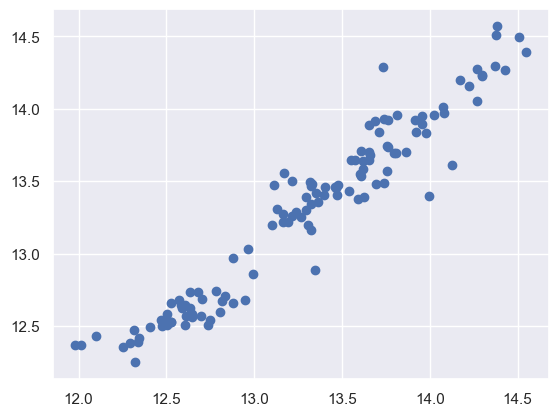

In [27]:
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)

Text(0.5, 1.0, 'Residuals PDF')

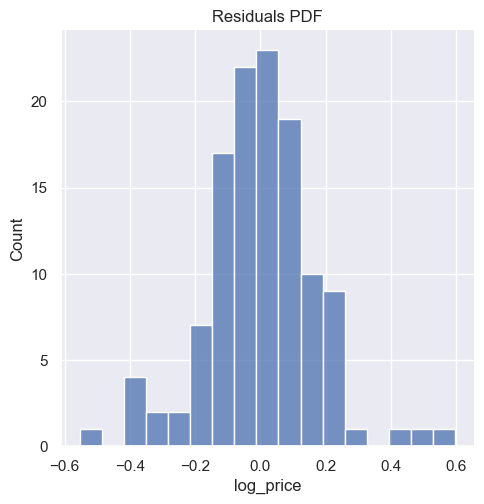

In [28]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF")

In [29]:
reg.score(x_train, y_train)

0.9297132901746926

In [30]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
adj_r2(x_train, y_train)

0.9246475813584543

In [41]:
adj_r2(x_test, y_test)

0.8306080720775787

In [32]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = (np.exp(reg.coef_ / scaler.scale_) - 1) * 100

In [33]:
from sklearn.feature_selection import f_regression
f_stat, p_values = f_regression(x_train, y_train)

In [34]:
reg_summary['f_stat'] = f_stat.round(3)
reg_summary['p_value'] = p_values.round(3)
reg_summary

,Features,Weights,f_stat,p_value
0,beds,3.876805,261.238,0.0
1,baths,0.614632,95.803,0.0
2,sqft,0.030396,343.884,0.0
3,yr_built,0.355555,15.658,0.0
4,cooling_yn_Yes,5.832327,22.850,0.0
5,style_Single Family Residential,76.773329,280.279,0.0
6,county_Multnomah County,-11.238512,23.019,0.0
7,has_hoa_Yes,-7.834059,15.274,0.0


In [35]:
y_hat_test = reg.predict(x_test)

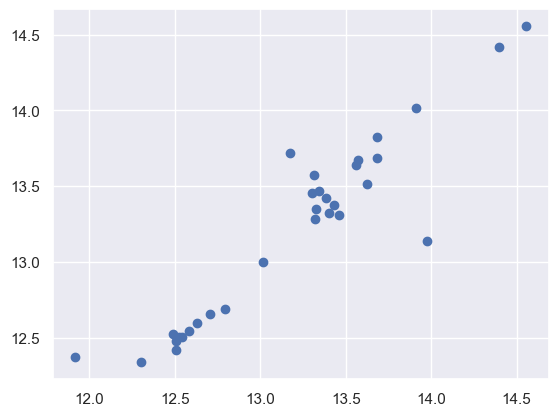

In [36]:
plt.scatter(y_test, y_hat_test)

In [37]:
df_pf = pd.DataFrame(y_hat_test, columns=['log_predictions'])
df_pf['predictions'] = np.exp(y_hat_test)

In [38]:
y_test = y_test.reset_index(drop=True)
df_pf['log_target'] = y_test
df_pf['target'] = np.exp(y_test)
df_pf

,log_predictions,predictions,log_target,target
0,13.641309,8.401272e+05,13.560618,775000.0
1,14.557018,2.099097e+06,14.556972,2099000.0
2,13.674619,8.685832e+05,13.573439,785000.0
3,12.418231,2.472687e+05,12.506177,270000.0
4,13.453339,6.961626e+05,13.304685,600000.0
5,12.655489,3.134793e+05,12.706848,330000.0
6,12.475443,2.618279e+05,12.506177,270000.0
7,13.573516,7.850607e+05,13.311329,604000.0
8,12.546344,2.810657e+05,12.581079,291000.0
9,12.594948,2.950642e+05,12.628067,305000.0


In [39]:
df_pf['residual'] = df_pf['target'] - df_pf['predictions']
df_pf['Difference%'] = df_pf['residual']/df_pf['target']*100
df_pf

,log_predictions,predictions,log_target,target,residual,Difference%
0,13.641309,8.401272e+05,13.560618,775000.0,-65127.162858,-8.403505
1,14.557018,2.099097e+06,14.556972,2099000.0,-96.547365,-0.004600
2,13.674619,8.685832e+05,13.573439,785000.0,-83583.225448,-10.647545
3,12.418231,2.472687e+05,12.506177,270000.0,22731.254624,8.418983
4,13.453339,6.961626e+05,13.304685,600000.0,-96162.597102,-16.027100
5,12.655489,3.134793e+05,12.706848,330000.0,16520.727810,5.006281
6,12.475443,2.618279e+05,12.506177,270000.0,8172.066291,3.026691
7,13.573516,7.850607e+05,13.311329,604000.0,-181060.725097,-29.976941
8,12.546344,2.810657e+05,12.581079,291000.0,9934.295219,3.413847
9,12.594948,2.950642e+05,12.628067,305000.0,9935.788554,3.257636


In [40]:
import scipy.stats as stats
SE_residual = np.sqrt(np.sum(df_pf['residual']**2) / (len(y_test) - x_test.shape[1]))
margin_error = SE_residual*stats.t.ppf(.90, len(x_test) - 1)
df_pf['lower_bound'] = df_pf['predictions'] - margin_error
df_pf['upper_bound'] = df_pf['predictions'] + margin_error
df_pf

,log_predictions,predictions,log_target,target,residual,Difference%,lower_bound,upper_bound
0,13.641309,8.401272e+05,13.560618,775000.0,-65127.162858,-8.403505,6.090283e+05,1.071226e+06
1,14.557018,2.099097e+06,14.556972,2099000.0,-96.547365,-0.004600,1.867998e+06,2.330195e+06
2,13.674619,8.685832e+05,13.573439,785000.0,-83583.225448,-10.647545,6.374844e+05,1.099682e+06
3,12.418231,2.472687e+05,12.506177,270000.0,22731.254624,8.418983,1.616990e+04,4.783676e+05
4,13.453339,6.961626e+05,13.304685,600000.0,-96162.597102,-16.027100,4.650637e+05,9.272614e+05
5,12.655489,3.134793e+05,12.706848,330000.0,16520.727810,5.006281,8.238042e+04,5.445781e+05
6,12.475443,2.618279e+05,12.506177,270000.0,8172.066291,3.026691,3.072909e+04,4.929268e+05
7,13.573516,7.850607e+05,13.311329,604000.0,-181060.725097,-29.976941,5.539619e+05,1.016160e+06
8,12.546344,2.810657e+05,12.581079,291000.0,9934.295219,3.413847,4.996686e+04,5.121646e+05
9,12.594948,2.950642e+05,12.628067,305000.0,9935.788554,3.257636,6.396536e+04,5.261631e+05
